In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [7]:
df_raw = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv',parse_dates=['CRASH DATE'])

/Users/akumar67/.conda/envs/solve/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2014-01-15,23:00,BROOKLYN,11237,40.703676,-73.915125,POINT (-73.9151247 40.703676),ST NICHOLAS AVENUE,HARMAN STREET,NaN,...,Unspecified,NaN,NaN,NaN,187392,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,2014-02-05,9:00,BRONX,10473,40.821881,-73.859261,POINT (-73.8592605 40.8218813),BOLTON AVENUE,LAFAYETTE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,84947,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
2,2014-01-24,12:10,NaN,NaN,40.688770,-73.999062,POINT (-73.999062 40.6887701),NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2976649,OTHER,PASSENGER VEHICLE,NaN,NaN,NaN
3,2014-02-07,13:30,NaN,NaN,NaN,NaN,NaN,RICHMOND AVENUE,INDEPENDENCE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,292840,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
4,2014-01-15,14:30,QUEENS,11433,40.703549,-73.781289,POINT (-73.7812893 40.7035489),177 STREET,105 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,212726,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [5]:
df_raw.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           516526
ZIP CODE                          516733
LATITUDE                          203248
LONGITUDE                         203248
LOCATION                          203248
ON STREET NAME                    335959
CROSS STREET NAME                 581249
OFF STREET NAME                  1447817
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4592
CONTRIBUTING FACTOR VEHICLE 2     232464
CONTRIBUTING FACTOR VEHICLE 3    1580768
CONTRIBUTING FACTOR VEHICLE 4    1668043
CONTRIBUTING FACTOR VEHICLE 5    1685392
COLLISION_ID                           0
VEHICLE TYPE COD

In [6]:
sqlcon = sqlite3.connect('nyc_collisions.db', timeout=90)

In [7]:
raw_cols = df_raw.columns.to_list()
edited_cols = [col.lower().replace(' ','_') for col in raw_cols]
dict_cols = dict(zip(raw_cols,edited_cols))

In [8]:
df_raw.rename(columns=dict_cols, inplace=True)

In [9]:
df_raw.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2014-01-15,23:00,BROOKLYN,11237,40.703676,-73.915125,POINT (-73.9151247 40.703676),ST NICHOLAS AVENUE,HARMAN STREET,NaN,...,Unspecified,NaN,NaN,NaN,187392,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1,2014-02-05,9:00,BRONX,10473,40.821881,-73.859261,POINT (-73.8592605 40.8218813),BOLTON AVENUE,LAFAYETTE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,84947,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
2,2014-01-24,12:10,NaN,NaN,40.688770,-73.999062,POINT (-73.999062 40.6887701),NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2976649,OTHER,PASSENGER VEHICLE,NaN,NaN,NaN
3,2014-02-07,13:30,NaN,NaN,NaN,NaN,NaN,RICHMOND AVENUE,INDEPENDENCE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,292840,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
4,2014-01-15,14:30,QUEENS,11433,40.703549,-73.781289,POINT (-73.7812893 40.7035489),177 STREET,105 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,212726,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [10]:
df_raw.to_sql('raw',if_exists='replace',con=sqlcon, index=False)

In [11]:
query = 'SELECT min(crash_date) as min_date, max(crash_date) as max_date FROM raw;'
df = pd.read_sql_query(query,con=sqlcon,parse_dates=['min_date','max_date'])

In [12]:
df

,min_date,max_date
0,2012-07-01,2020-07-11


In [13]:
query = 'SELECT COUNT(*) as nrows, COUNT(collision_id) as ncollisionids FROM raw;'
df = pd.read_sql_query(query, con=sqlcon)

In [14]:
df

,nrows,ncollisionids
0,1691408,1691408


In [15]:
query = 'SELECT distinct borough FROM raw;'
df = pd.read_sql_query(query, con=sqlcon)

In [16]:
df

,borough
0,BROOKLYN
1,BRONX
2,None
3,QUEENS
4,STATEN ISLAND
5,MANHATTAN


In [17]:
query = 'SELECT borough, count(*) as ncrashes FROM raw GROUP BY borough;'
df_borough = pd.read_sql(query, con=sqlcon)

In [18]:
df_borough

,borough,ncrashes
0,None,516526
1,BRONX,166126
2,BROOKLYN,366400
3,MANHATTAN,277971
4,QUEENS,314344
5,STATEN ISLAND,50041


Text(0, 0.5, '')

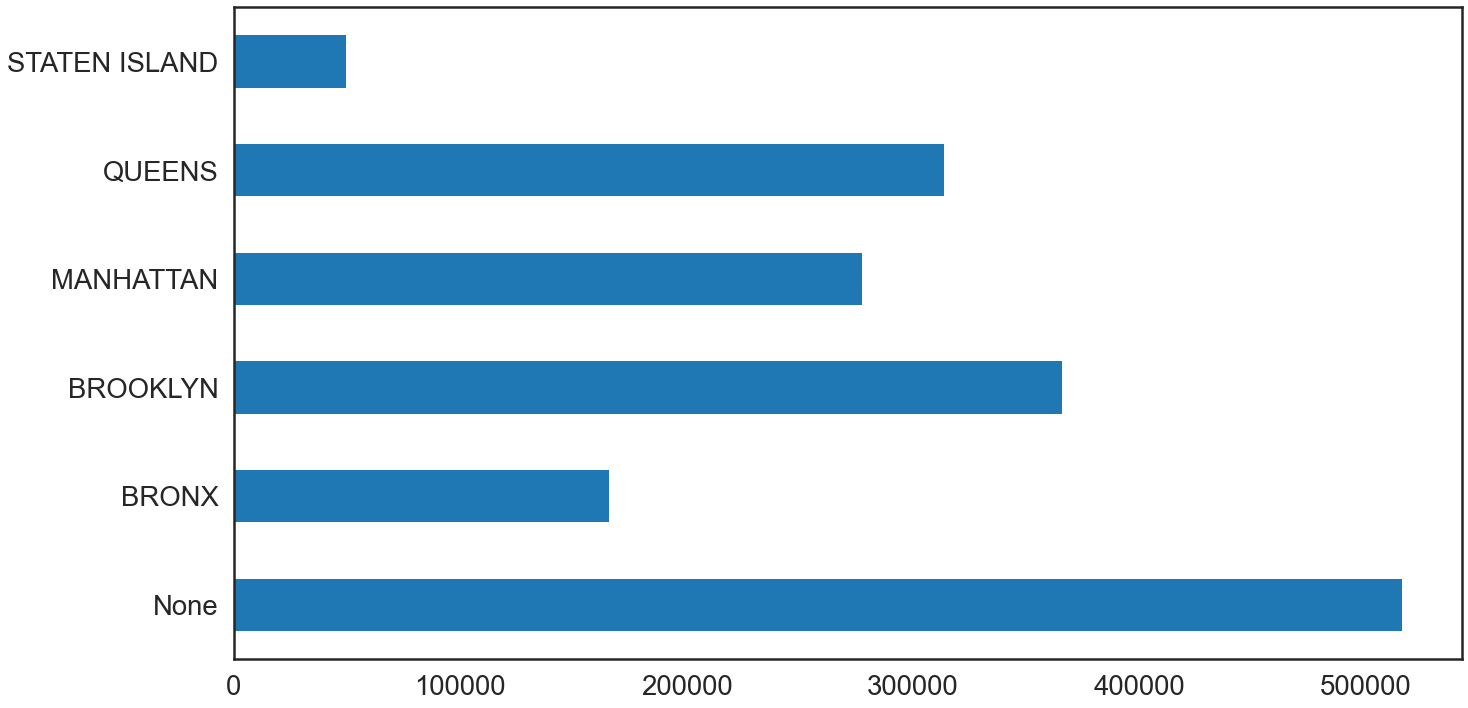

In [20]:
sns.set_style("white")
fig, ax = plt.subplots(1,figsize=(22, 12))
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})
df_borough.set_index('borough').plot(kind='barh', ax=ax, legend=False)
plt.ylabel('')

In [21]:
query = 'SELECT SUM(borough IS NULL AND location IS NULL AND on_street_name IS NULL) FROM raw;'
df = pd.read_sql_query(query, con=sqlcon)

In [22]:
df

,SUM(borough IS NULL AND location IS NULL AND on_street_name IS NULL)
0,48474


In [23]:
query = 'SELECT count(*) FROM raw WHERE vehicle_type_code_3 IS NOT NULL;'
pd.read_sql_query(query, con=sqlcon)

,count(*)
0,107922


In [24]:
query = 'SELECT count(*) FROM raw WHERE vehicle_type_code_4 IS NOT NULL;'
pd.read_sql_query(query, con=sqlcon)

,count(*)
0,22747


In [25]:
query = 'SELECT count(*) FROM raw WHERE vehicle_type_code_5 IS NOT NULL;'
pd.read_sql_query(query, con=sqlcon)

,count(*)
0,5856


In [31]:
query = """
SELECT borough, year, count(*) as ncrashes FROM (
SELECT collision_id, borough, strftime('%Y',crash_date) as year FROM raw) as x
GROUP BY borough, year;"""
df = pd.read_sql_query(query, con=sqlcon)


In [101]:
q='select count(distinct vehicle_type_code_1) from raw;'
pd.read_sql_query(q,con=sqlcon)

,count(distinct vehicle_type_code_1)
0,1046


In [36]:
df.head()

,borough,year,ncrashes
0,None,2012,22968
1,None,2013,47761
2,None,2014,49685
3,None,2015,54231
4,None,2016,76527


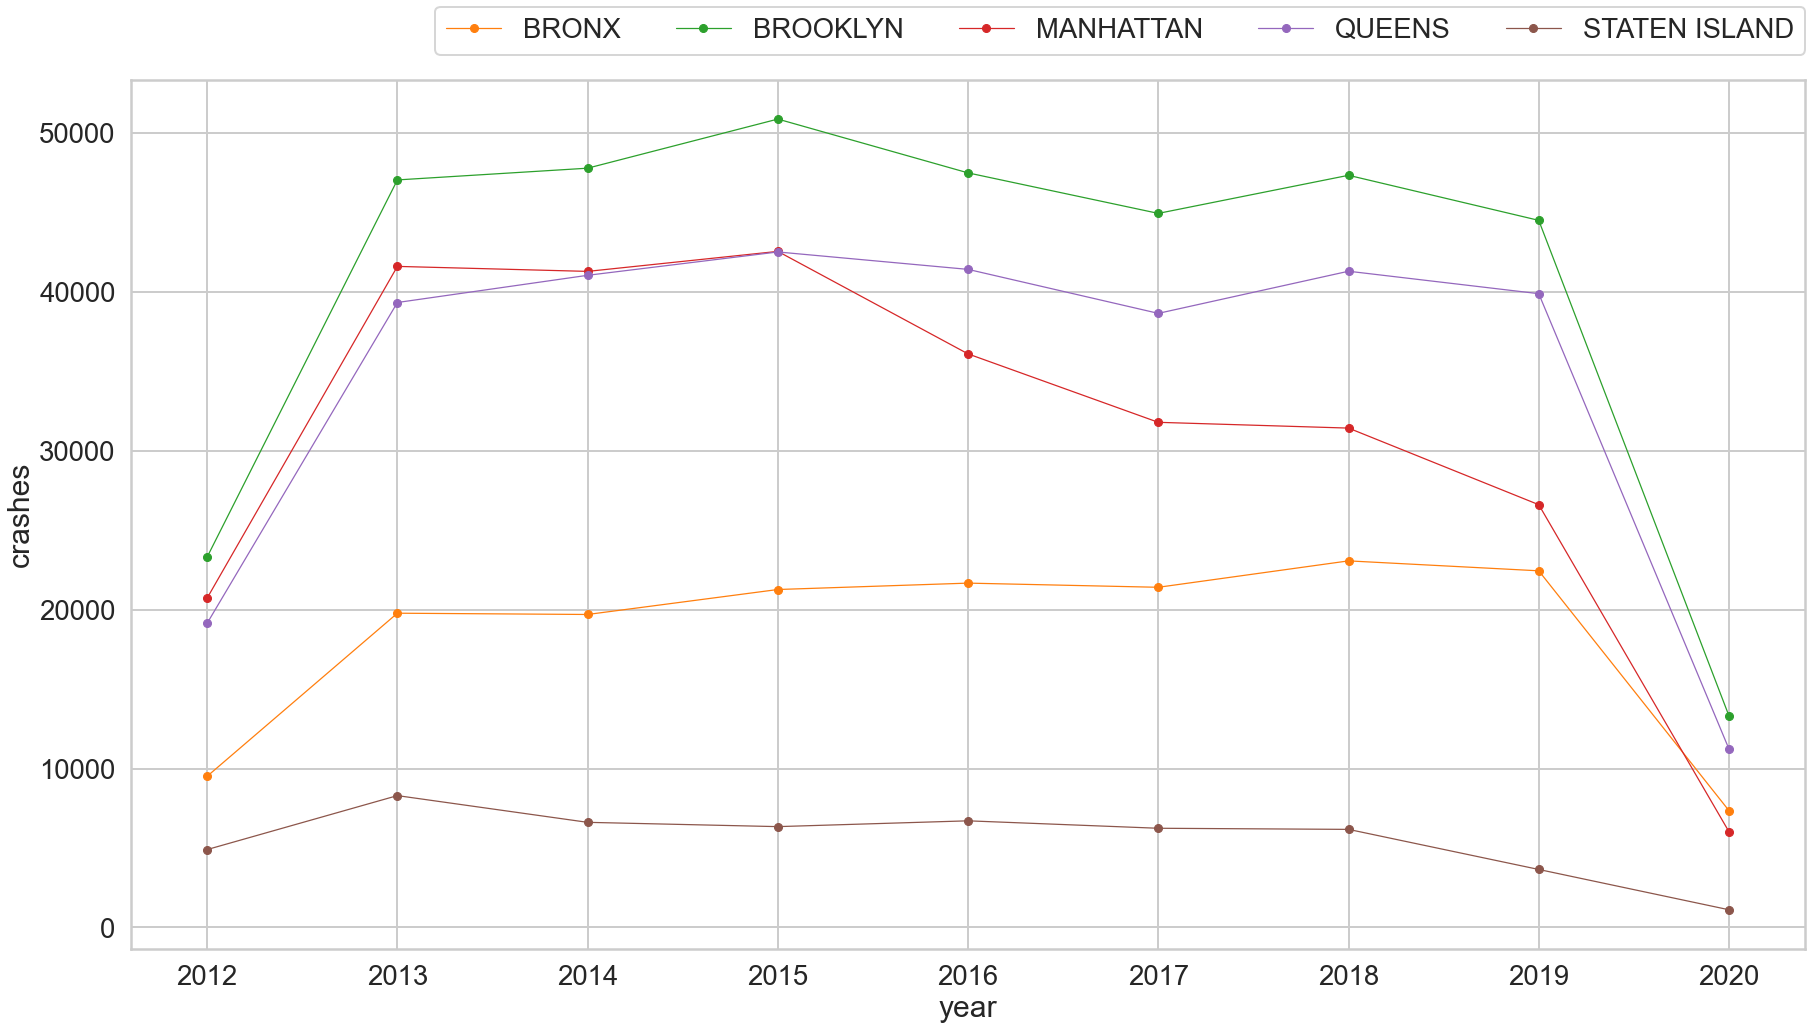

In [77]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(30, 16))
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})
for borough in df.borough.unique():
    df_borough = df[df.borough == borough]
    plt.plot(df_borough.year.values,df_borough.ncrashes.values, label=borough,marker='o')
plt.xlabel('year')
plt.ylabel('crashes')
plt.legend(bbox_to_anchor=(0., 1.005, 1., .102), loc=7,ncol=5, borderaxespad=0.)

In [79]:
query = """
SELECT borough, year, month ,count(*) as ncrashes FROM (
SELECT collision_id, borough, strftime('%Y',crash_date) as year, strftime('%m',crash_date) as month FROM raw) as x
GROUP BY borough, year, month;"""
df = pd.read_sql_query(query, con=sqlcon)

In [80]:
df

,borough,year,month,ncrashes
0,None,2012,07,3839
1,None,2012,08,3967
2,None,2012,09,3733
3,None,2012,10,3874
4,None,2012,11,3644
...,...,...,...,...
577,STATEN ISLAND,2020,03,178
578,STATEN ISLAND,2020,04,116
579,STATEN ISLAND,2020,05,154
580,STATEN ISLAND,2020,06,157


In [86]:
df.dtypes

borough     object
year        object
month       object
ncrashes     int64
dtype: object

In [81]:
import datetime
dates = []
for year, month in list(zip(df.year.values, df.month.values)):
    dates.append(datetime.date(int(year),int(month),1)
df['day'] = dates

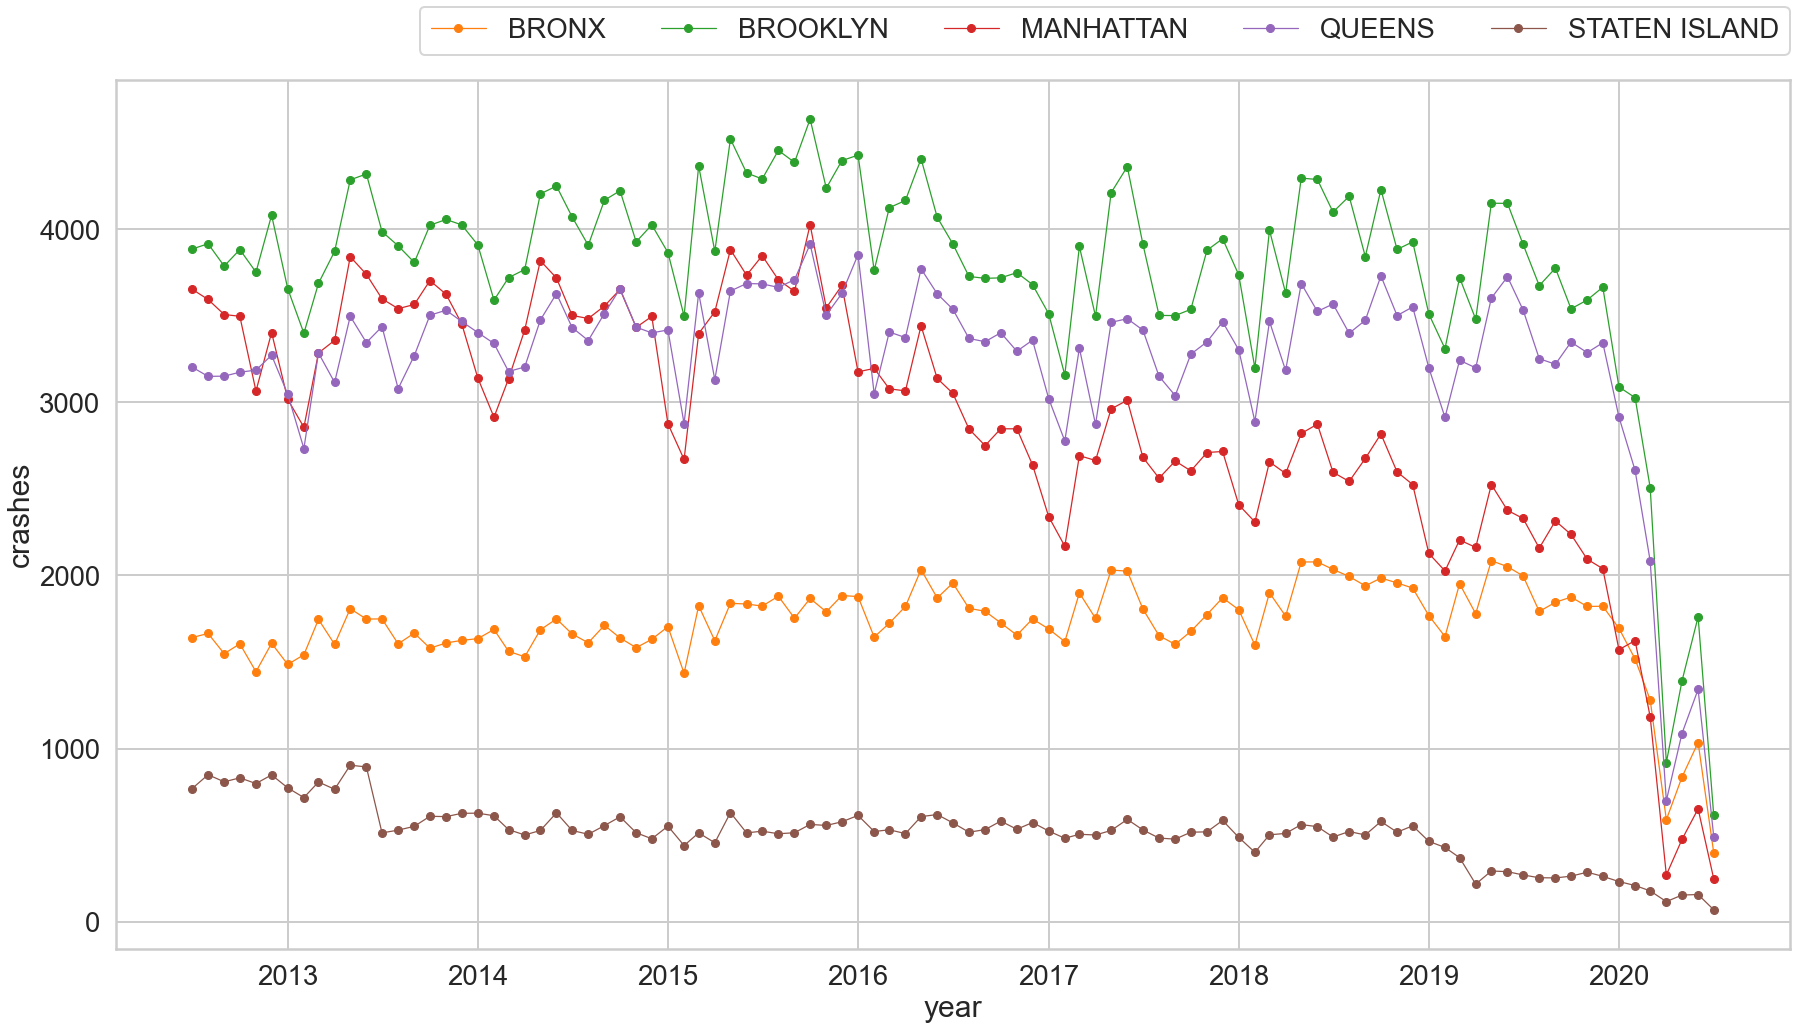

In [99]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(30, 16))
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})
for borough in df.borough.unique():
    df_borough = df[df.borough == borough]
    plt.plot(df_borough.day.values,df_borough.ncrashes.values, label=borough,marker='o')
plt.xlabel('year')
plt.ylabel('crashes')
plt.legend(bbox_to_anchor=(0., 1.005, 1., .102), loc=7,ncol=5, borderaxespad=0.)